### Notes on Logistic Regression

The data consists of:

- A collection D of N d-dimensional column vectors x (so an 
    (d,N) data matrix) 
    
- A label for each column vector between 0 and k-1 which we represent as an 
    (k,N)
    matrix $L$ such that the jth column has a 1 in the ith row if D[:,j] is in class i,
    and zeroes elsewhere in that column.

The logistic regression model has for parameters a matrix W of size (k,d)
and a bias vector b of
size (k,1). To simplify the notation, let's add a dimension to our column
vectors and set every last value to 1; then we can treat the biases
as part of our matrices W.  From now on our dimension d includes this extra
dimension.


Let $\sigma$ be the softmax function.  The model assigns the multinomial probabilities
$\sigma(Wx)$ to x and we wish to maximize the likelihood of the data given W.  Note that $\sigma(Wx)$  is a (k,1) column vector. 

The relevant loss function is the log-likelihood of the model.  Suppose
that the point $D[:,j]$ belongs to class $i$. Then 

$$
\sum_{j=1}^{N} log\sigma(W[i,:]D[:,j])
$$

In other words, the log-likelihood has a contribution equal to the log of the
probability that the model assigns to point j belonging to its actual class.
We want to maximize this.

To apply gradient descent we need the gradient of the $\log\sigma(Wx)$.
Recall that
$$
(\sigma(WD[:,j]))_i = \frac{e^{W[i,:]D[:,j]}}{Z}
$$
where
$$
Z = \sum_{i=1}^{k} e^{W[i,:]D[:,j]}.
$$

Taking the logarithmic derivative of $\partial_i=\partial/\partial W[i,:]$
gives
$$
\partial_i (\log\sigma(WD[:,k]])_j = -\log\partial_i(Z)
$$
if $j\not=i$ and
$$
\partial_i\log\sigma(WD[:,k])_i = D[:,k]-\log\partial_i(Z)
$$

Using the definition of $Z$ we get
$$
\partial_i\log(Z) = D[:,k](\sigma(WD[:,k])_i
$$


To make sense of these formulas, each term in the sum making up the log likelihood
 -- that is, each data point -- contributes to the gradient.  That contribution
 is $\log\sigma(WD[:,j])_i$ where $i$ is the class to which the point belongs
 The contribution of this term to the gradient in row i is the a multiple
 of the data point:
 $$
 \partial_i = D[:,k](1-(\sigma(WD[:,k])_i)
 $$
 while in other rows the multiple is:
 $$
 \partial_j = -D[:,k](\sigma(WD[:,k])_i)
 $$
 
 Since the probabilities $\sigma(WD[:,k])_i$ are between $0$ and $1$,
 this means that if we follow the gradient the weights in the ith row will 
 be increased a bit while the weights in all the other rows will be
 decreased a bit in the direction of the jth data point if that point belongs to class i.
 
 
 


In [204]:
import numpy as np
from numpy.random import normal
from numpy.random import shuffle

Make N points in dim dimensions chosen from two normals at diagonal means 1 and -1.

In [331]:
N = 100
dim = 2
A = normal(1,size=dim*N).reshape(dim,N)
LA = np.concatenate([np.ones(N).reshape(1,N),np.zeros(N).reshape(1,N)],axis=0)
B = normal(-1,size=dim*N).reshape(dim,N)
LB = np.concatenate([np.zeros(N).reshape(1,N),np.ones(N).reshape(1,N)],axis=0)
D = np.concatenate([A,B],axis=1)
L = np.concatenate([LA,LB],axis=1)
print(D.shape)
D=np.concatenate([D,np.ones(2*N).reshape(1,2*N)])
W=np.random.normal(size=2*(dim+1)).reshape(2,dim+1)
W.shape, D.shape

(2, 200)


((2, 3), (3, 200))

In [332]:
def sigma(W,D):
    n = np.exp(np.dot(W,D))
    Z = n.sum(axis=0)
    return n/Z

In [333]:
def loss(W,D,L):
    return (np.log(sigma(W,D))*L).sum()

In [336]:
def gradient(j,W,D):
    if L[0,j]==1:
        return np.concatenate([(1-sigma(W,D)[0,j])*D[:,j].reshape(1,3),-sigma(W,D)[0,j]*D[:,j].reshape(1,3)])
    else:
        return np.concatenate([-sigma(W,D)[1,j]*D[:,j].reshape(1,3),(1-sigma(W,D)[1,j])*D[:,j].reshape(1,3)])

In [337]:

e = 0
eL = []
for i in range(10000):
    for j in range(40):
        Wnew = W + .001*gradient(j,W,D)
    W = Wnew
    enew = loss(W,D,L)
    if np.abs(e-enew)<.001:
        print("stopping after {} iterations with loss {}".format(i,enew))
        break
    e = enew
    eL.append(e)


stopping after 2385 iterations with loss -56.087857511063525


In [338]:
mistakes=0
for i in range(40):
    if (np.argmax(sigma(W,D)[:,i])==0) != (np.mean(D[:,i])>=0):
        mistakes +=1
print('We had only {} mistakes'.format(mistakes))

We had only 0 mistakes


In [339]:
import matplotlib.pyplot as plt


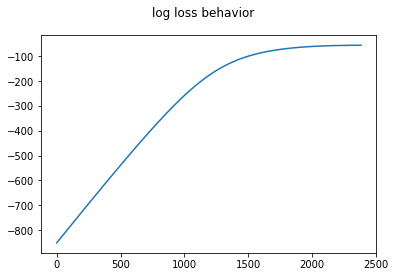

In [340]:
_=plt.plot(range(len(eL)),eL)
_=plt.suptitle('log loss behavior')

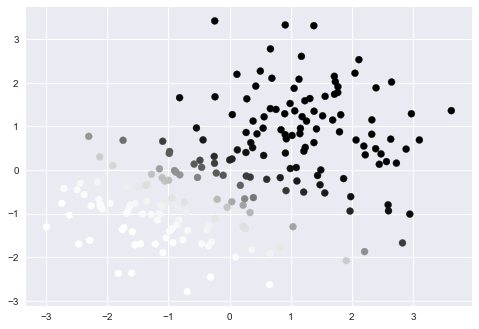

In [355]:
plt.style.use('seaborn')
plt.scatter(x=D[0,:],y=D[1,:],c=P[0,:])

In [357]:
B = (W[0,:]-W[1,:])

In [359]:
B/B[1]

array([0.59697996, 1.        , 0.61008918])

In [363]:
x = np.linspace(-6,6,100)
y = -.5969*x-.610

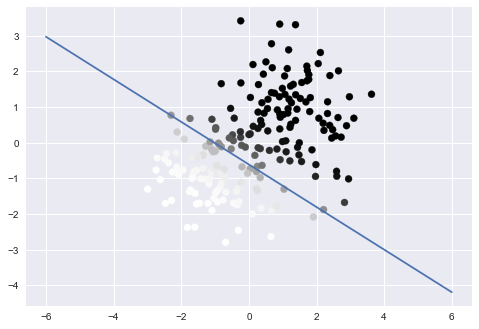

In [364]:
plt.scatter(x=D[0,:],y=D[1,:],c=P[0,:])
plt.plot(x,y)